## clonando projeto

In [6]:
!rm -rf API-NEXUS

In [7]:
!git clone https://github.com/PatoJosefo/API-NEXUS.git

Cloning into 'API-NEXUS'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 243 (delta 79), reused 38 (delta 20), pack-reused 106 (from 1)
Receiving objects: 100% (243/243), 809.40 KiB | 10.79 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [8]:
import sys
sys.path.append('API-NEXUS/src')

## Lendo arquivos

In [9]:
import backend.leitura_dataset as leitura
leitura.autenticacao_google()
data_sets, util_data = leitura.pegar_dados()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Analise (filtro)

In [13]:
from IPython.display import display, clear_output

import backend.analise as analise
clear_output(wait=True)

def button_fn(_):
  with output:
      f_df = analise.realizar_analise(
          data_sets,
          util_data["df_municipios"],
          util_data["df_ncm_sh"],
          ano_dropdown.value,
          atividade_dropdown.value,
          tipo_dropdown.value,
          mes_dropdown.value,
          mun_dropdown.value,
      )
      display(f_df)

## mostrar dropdown

In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output


#dropdown seleção ano
ano_dropdown = widgets.Dropdown(
    options=list(data_sets.keys()),
    description='Ano:*',
    value = list(data_sets.keys())[0],
    disabled=False,
)

#dropdown seleção atividade
atividade_dropdown = widgets.Dropdown(
    options=['Importação', 'Exportação'],
    description='Atividade:*',
    value = 'Importação',
    disabled=False,
)

#dropdown seleção tipo
tipo_dropdown = widgets.Dropdown(
    options=['Valor Agregado', 'SH4', 'KG_LIQUIDO', 'Valor FOB'],
    description='Filtrar por:* ',
    value = 'Valor Agregado',
    disabled=False,
)
mes_dropdown = widgets.Dropdown(
    options=[('Não selecionar', None), ('Janeiro', 1), ('Fevereiro', 2), ('Março', 3), ('Abril', 4),
             ('Maio', 5), ('Junho', 6), ('Julho', 7), ('Agosto', 8),
             ('Setembro', 9), ('Outubro', 10), ('Novembro', 11), ('Dezembro', 12)],
    description='Mês:',
    value=1,
    disabled=False,
)

#dropdown seleção município
mun_dropdown = widgets.Dropdown(
    options=util_data["df_mun_nomes"],
    description='Município:*',
    value = util_data["df_mun_nomes"][0],
    disabled=False,
)
display(ano_dropdown, atividade_dropdown,tipo_dropdown, mes_dropdown, mun_dropdown)
#output = widgets.Output()
display(output)

button = widgets.Button(description="Realizar Análise")

button.on_click(button_fn)
display(button)

Dropdown(description='Ano:*', options=(2019, 2020, 2021, 2022, 2023, 2024), value=2019)

Dropdown(description='Atividade:*', options=('Importação', 'Exportação'), value='Importação')

Dropdown(description='Filtrar por:* ', options=('Valor Agregado', 'SH4', 'KG_LIQUIDO', 'Valor FOB'), value='Va…

Dropdown(description='Mês:', index=1, options=(('Não selecionar', None), ('Janeiro', 1), ('Fevereiro', 2), ('M…

Dropdown(description='Município:*', options=('ADAMANTINA', 'ADOLFO', 'AGUAI', 'AGUAS DA PRATA', 'AGUAS DE LIND…

Output()

Button(description='Realizar Análise', style=ButtonStyle())

## Filtros por NCM

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns

In [2]:
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks/API1S/base_dados_por_NCM"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1ovFyFw1g-JDcDBdhCVd9BP9B1-jmPEtE/API1S/base_dados_por_NCM


In [3]:
df_ncm = pd.read_csv("NCM.csv", sep=";", encoding="latin1", on_bad_lines="skip", usecols="CO_NCM NO_NCM_POR".split())
df_via = pd.read_csv("VIA.csv", sep=";", encoding="latin1", on_bad_lines="skip", usecols="CO_VIA NO_VIA".split())
df_pais = pd.read_csv("PAIS.csv", sep=";", encoding="latin1", on_bad_lines="skip", usecols="CO_PAIS NO_PAIS".split())

arquivos_ncm_exp = []
arquivos_ncm_imp = []

for ano in range(2019, 2026):
    colunas = ["CO_NCM", "SG_UF_NCM", "CO_VIA", "KG_LIQUIDO", "VL_FOB", "CO_MES", "CO_PAIS"]

    df_exp = pd.read_csv(f"EXP_{ano}.csv", sep=";", encoding="latin1", on_bad_lines="skip", usecols=colunas)
    df_exp = df_exp[df_exp['SG_UF_NCM'] == 'SP']
    df_exp = pd.merge(df_exp, df_ncm, on="CO_NCM", how="left")
    df_exp = pd.merge(df_exp, df_via, on="CO_VIA", how="left")
    df_exp = pd.merge(df_exp, df_pais, on="CO_PAIS", how="left")
    arquivos_ncm_exp.append(df_exp)

    df_imp = pd.read_csv(f"IMP_{ano}.csv", sep=";", encoding="latin1", on_bad_lines="skip", usecols=colunas)
    df_imp = df_imp[df_imp['SG_UF_NCM'] == 'SP']
    df_imp = pd.merge(df_imp, df_ncm, on="CO_NCM", how="left")
    df_imp = pd.merge(df_imp, df_via, on="CO_VIA", how="left")
    df_imp = pd.merge(df_imp, df_pais, on="CO_PAIS", how="left")
    arquivos_ncm_imp.append(df_imp)

In [4]:
def formatar_valor_reais(valor_reais):
  if valor_reais >= 1_000_000_000:
    return f"R$ {valor_reais / 1_000_000_000:.2f} bi"
  elif valor_reais >= 1_000_000:
    return f"R$ {valor_reais / 1_000_000:.2f} mi"
  elif valor_reais >= 1_000:
    return f"R$ {valor_reais / 1_000:.2f} mil"
  else:
    return f"R$ {valor_reais:.2f}"

In [6]:
def realizar_analise(_):
    with output:
        clear_output()

        ano_selecionado = anos_dropdown.value
        atividade_selecionada = atividade_dropdown.value
        tipo_selecionado = tipo_dropdown.value
        cod_ncm = ncm_input.value

        if cod_ncm not in df_ncm['CO_NCM'].values:
            print("Código NCM inválido.")
            return

        indice = df_ncm[df_ncm['CO_NCM'] == cod_ncm].index[0]
        ncm_nome = df_ncm.loc[indice, 'NO_NCM_POR']

        cod_via = via_dropdown.value
        via_nome = next((n for n, v in via_dropdown.options if v == cod_via), "Todos")

        periodo = periodo_dropdown.value
        sem_selecionado = periodo_sem.value if periodo == 'Semestral' else None
        cod_mes = meses.value if periodo == 'Mensal' else None
        co_pais_filtro = co_pais_selecionado if pais_dropdown.value is not None else None
        mes_selecionado = dict(meses.options).get(cod_mes, None)
        periodo_selecionado = sem_selecionado if periodo == 'Semestral' else mes_selecionado

        indice = ano_selecionado - 2019
        arquivo_selecionado = arquivos_ncm_imp[indice] if atividade_selecionada == "Importação" else arquivos_ncm_exp[indice]

        base_filtro = arquivo_selecionado[arquivo_selecionado['CO_NCM'] == cod_ncm]

        if cod_via is not None:
            base_filtro = base_filtro[base_filtro['CO_VIA'] == cod_via]

        if periodo == "Mensal" and cod_mes is not None:
            base_filtro = base_filtro[base_filtro['CO_MES'] == cod_mes]
        elif periodo == "Semestral" and sem_selecionado is not None:
            codigo_sem = {'Janeiro-Junho': 1, 'Julho-Dezembro': 2}
            lista_sem = list(range(1, 7)) if codigo_sem[sem_selecionado] == 1 else list(range(7, 13))
            base_filtro = base_filtro[base_filtro['CO_MES'].isin(lista_sem)]

        if co_pais_filtro is not None:
            base_filtro = base_filtro[base_filtro['CO_PAIS'] == co_pais_filtro]

        match tipo_selecionado:
            case "FOB":
                soma_fob = base_filtro['VL_FOB'].sum()
                print(f'\nMercadoria: {ncm_nome}\n')
                print(f"Soma de FOB para o NCM {cod_ncm}: {formatar_valor_reais(soma_fob)}\nVia: {via_nome}\nPeríodo: {periodo_selecionado or 'Todos'}\nPaís: {pais_selecionado}\nAno: {ano_selecionado}")
            case "Valor Agregado":
                print(f'\nMercadoria: {ncm_nome}\n')
                base_filtro = base_filtro[base_filtro["KG_LIQUIDO"] > 0]
                base_filtro['VALOR_AGREGADO'] = base_filtro['VL_FOB'] / base_filtro['KG_LIQUIDO']
                soma_va = base_filtro['VALOR_AGREGADO'].sum()
                print(f"Soma de Valor Agregado para o NCM {cod_ncm}: {formatar_valor_reais(soma_va)}\nVia: {via_nome}\nPeríodo: {periodo_selecionado or 'Todos'}\nPaís: {pais_selecionado}\nAno: {ano_selecionado}")
            case "KG líquido":
                print(f'\nMercadoria: {ncm_nome}\n')
                soma_kgl = base_filtro['KG_LIQUIDO'].sum()
                print(f"Soma de KG Líquido para o NCM {cod_ncm}: {soma_kgl}kg\nVia: {via_nome}\nPeríodo: {periodo_selecionado or 'Todos'}\nPaís: {pais_selecionado}\nAno: {ano_selecionado}")


In [11]:
print('\nCampos obrigatórios: \n')

ncm_input = widgets.IntText(description="Código NCM:")

anos_dropdown = widgets.Dropdown(
    options=[2019, 2020, 2021, 2022, 2023, 2024, 2025],
    value=2019,
    description='Ano:'
)

atividade_dropdown = widgets.Dropdown(
    options=['Exportação', 'Importação'],
    value='Exportação',
    description='Atividade:'
)

tipo_dropdown = widgets.Dropdown(
    options=['FOB', 'Valor Agregado', 'KG líquido'],
    value='FOB',
    description='Tipo:'
)
display(ncm_input,anos_dropdown, atividade_dropdown, tipo_dropdown)

print('\nCampos opcionais: \n')

via_dropdown = widgets.Dropdown(
    options=[('Todos', None), ('Entrada/saída Ficta',10), ('Marítima',1), ('Fluvial',2), ('Lacustre',3),
             ('Aérea',4), ('Postal',5), ('Ferroviária',6), ('Rodoviária',7), ('Conduto/Rede de Transmissão',8),
             ('Meios próprios',9), ('Reboque',13), ('Courier',11), ('Vicinal Fronteiriço',15), ('Dutos',14),
             ('Em mãos',12), ('Via não declarada', 0), ('Via desconhecida',99)],
    value=None,
    description='Via:'
)

periodo_dropdown = widgets.Dropdown(
    options=['Mensal', 'Semestral'],
    value=None,
    description='Período:'
)
pais_dropdown = widgets.Dropdown(
    options=[(row['NO_PAIS'], row['CO_PAIS']) for _, row in df_pais.iterrows()],
    value=None,
    description='País:'
)
display(periodo_dropdown, via_dropdown, pais_dropdown)

periodo_sem = widgets.Dropdown(
    options=['Janeiro-Junho', 'Julho-Dezembro'],
    value='Janeiro-Junho',
    description='Semestre:')

meses = widgets.Dropdown(
    options=[('Janeiro',1),('Fevereiro',2),('Março',3), ('Abril',4), ('Maio',5), ('Junho',6),('Julho',7), ('Agosto',8),
             ('Setembro',9), ('Outubro',10), ('Novembro',11), ('Dezembro',12)],
    value=1,
    description='Mês:'
)

output_periodo = widgets.Output()

def atualizar_periodo(_):
    with output_periodo:
        clear_output()
        if periodo_dropdown.value == 'Semestral':
            display(periodo_sem)
        elif periodo_dropdown.value == 'Mensal':
            display(meses)

periodo_dropdown.observe(atualizar_periodo, names='value')
display(output_periodo)

output = widgets.Output()
display(output)

pais_selecionado = None
co_pais_selecionado = None

def atualizar_pais(_):
    global pais_selecionado, co_pais_selecionado
    if pais_dropdown.value is not None:
        pais_selecionado = df_pais[df_pais['CO_PAIS'] == pais_dropdown.value]['NO_PAIS'].values[0]
        co_pais_selecionado = pais_dropdown.value
    else:
        pais_selecionado = None
        co_pais_selecionado = None

pais_dropdown.observe(atualizar_pais, names='value')

output = widgets.Output()

button = widgets.Button(description="Realizar Análise")
button.on_click(realizar_analise)
display(output)
display(button)

#59113100


Campos obrigatórios: 



IntText(value=0, description='Código NCM:')

Dropdown(description='Ano:', options=(2019, 2020, 2021, 2022, 2023, 2024, 2025), value=2019)

Dropdown(description='Atividade:', options=('Exportação', 'Importação'), value='Exportação')

Dropdown(description='Tipo:', options=('FOB', 'Valor Agregado', 'KG líquido'), value='FOB')


Campos opcionais: 



Dropdown(description='Período:', options=('Mensal', 'Semestral'), value=None)

Dropdown(description='Via:', options=(('Todos', None), ('Entrada/saída Ficta', 10), ('Marítima', 1), ('Fluvial…

Dropdown(description='País:', options=(('Não Definido', 0), ('Afeganistão', 13), ('Aland, Ilhas', 15), ('Albân…

Output()

Output()

Output()

Button(description='Realizar Análise', style=ButtonStyle())

## Variação Sazonal

In [9]:
%cd "/content/drive/MyDrive/Colab Notebooks/API1S/base_dados_por_municipio"

/content/drive/.shortcut-targets-by-id/1ovFyFw1g-JDcDBdhCVd9BP9B1-jmPEtE/API1S/base_dados_por_municipio


In [10]:
ano = 2019
lista_arquivos = []
while ano <= 2024:
    df = pd.read_csv(f"EXP_{ano}_MUN.csv", sep=";", encoding="latin1",
                     on_bad_lines="skip",
                     usecols="CO_MES SH4 CO_PAIS SG_UF_MUN CO_MUN KG_LIQUIDO VL_FOB".split())

    #adiciona a coluna do ano manualmente (pois não vem no CSV)
    df["ANO"] = ano
    lista_arquivos.append(df)
    ano += 1

In [12]:
df_geral = pd.concat(lista_arquivos, ignore_index=True)
df_geral = df_geral[df_geral["SG_UF_MUN"] == "SP"]

#remove linhas com CO_MES nulo ou não numérico
df_geral = df_geral[df_geral["CO_MES"].notnull()]
df_geral = df_geral[df_geral["CO_MES"].apply(lambda x: str(x).isdigit())]

#converte CO_MES para inteiro (representa o número do mês)
df_geral["MES"] = df_geral["CO_MES"].astype(int)
df_sazonal = df_geral.groupby(["ANO", "MES"])["VL_FOB"].sum().reset_index()

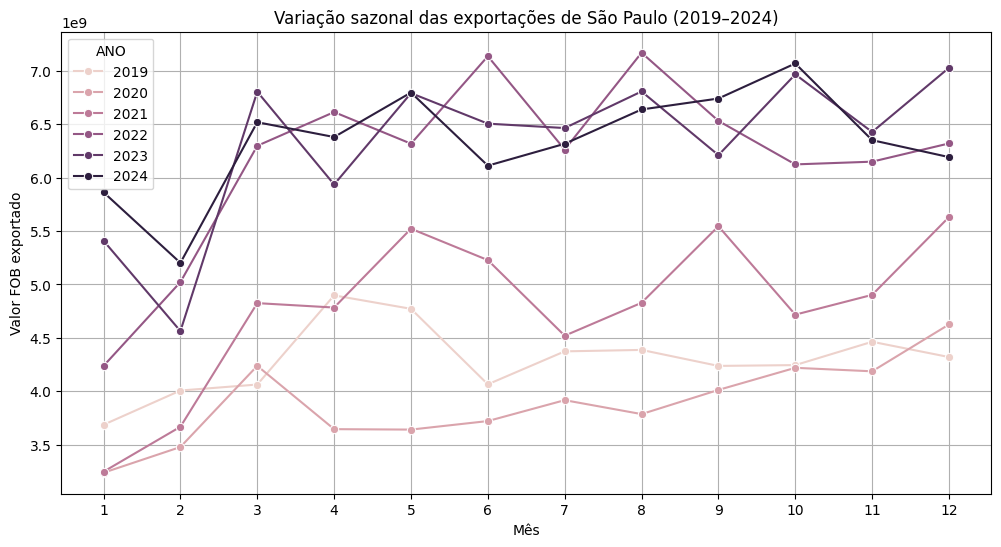

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sazonal, x="MES", y="VL_FOB", hue="ANO", marker="o")
plt.title("Variação sazonal das exportações de São Paulo (2019–2024)")
plt.xlabel("Mês")
plt.ylabel("Valor FOB exportado")
plt.xticks(range(1, 13)) #meses de 1 a 12
plt.grid(True)
plt.show()

In [14]:
df_mun = pd.read_csv("UF_MUN.csv", sep=";", encoding="ISO-8859-1", on_bad_lines="skip",
                     usecols="CO_MUN_GEO NO_MUN_MIN SG_UF".split())

df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN", "SG_UF": "SG_UF_MUN"})
df_mun = df_mun[df_mun["SG_UF_MUN"] == "SP"]

#tabela de códigos SH4 com nomes dos produtos
df_sh4 = pd.read_csv("NCM_SH.csv", sep=";", encoding="ISO-8859-1", on_bad_lines="skip")
df_sh4 = df_sh4[['CO_SH4', 'NO_SH4_POR']]
df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4"})

#evita divisão por zero
df_geral = df_geral[df_geral["KG_LIQUIDO"] > 0]

#cria nova coluna: valor agregado por kg
df_geral["VALOR_AGREGADO"] = df_geral["VL_FOB"] / df_geral["KG_LIQUIDO"]

<ipython-input-14-ca456d09633e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geral["VALOR_AGREGADO"] = df_geral["VL_FOB"] / df_geral["KG_LIQUIDO"]


In [15]:
df_geral["CO_MUN"] = df_geral["CO_MUN"].astype(str)
df_mun["CO_MUN"] = df_mun["CO_MUN"].astype(str)
df_geral["SH4"] = df_geral["SH4"].astype(str)
df_sh4["SH4"] = df_sh4["SH4"].astype(str)

#junta o nome dos municípios
df_geral = df_geral.merge(df_mun, how="inner", on="CO_MUN")
df_geral = df_geral.merge(df_sh4, how="inner", on="SH4")

carga_mun = df_geral.groupby(["NO_MUN_MIN", "NO_SH4_POR"])['VALOR_AGREGADO'].mean().reset_index()

In [16]:
top5 = carga_mun.sort_values(by="VALOR_AGREGADO", ascending=False).head(5)
print("\nTop 5 municípios com maior valor agregado por produto (média):\n")
print(top5)


Top 5 municípios com maior valor agregado por produto (média):

        NO_MUN_MIN                                         NO_SH4_POR  \
28548  Pirapozinho  Âmbar-cinzento, castóreo, algália e almíscar; ...   
6345      Caieiras  Platina, em formas brutas ou semimanufacturada...   
39521    São Paulo                                   Energia elétrica   
9667         Cotia  Outros veículos aéreos (por exemplo: helicópte...   
40343    São Roque  Bússolas, incluídas as agulhas de marear; outr...   

       VALOR_AGREGADO  
28548   210886.833333  
6345    170321.000000  
39521   134190.368133  
9667    130651.134487  
40343   122121.571701  


## Mapeamento Municípios

In [17]:
#!pip install geopy folium pandas
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [18]:
data = {
    "NO_MUN_MIN": ["Itapevi", "São Paulo", "Jarinu", "Barueri", "Barueri", "Jarinu", "Rio Claro", "Gavião Peixoto", "Cotia", "Diadema", "Cotia", "Caieiras", "Jacareí", "Ibitinga", "Americana"],
    "SG_UF_MUN_x": ["SP"] * 15,
    "NO_SH4_POR": [
        "Tiocompostos orgânicos",
        "Obras cartográficas",
        "Elementos químicos radioativos",
        "Âmbar-cinzento, castóreo",
        "Ouro em formas brutas",
        "Elementos químicos radioativos",
        "Platina em formas brutas",
        "Binóculos e lunetas astronômicas",
        "Elementos químicos radioativos",
        "Platina em formas brutas",
        "Helicópteros e drones",
        "Platina em formas brutas",
        "Circuitos integrados eletrônicos",
        "Produtos de origem animal",
        "Obras de metais preciosos"
    ],
    "VALOR_AGREGADO": [
        278200.0, 175000.0, 98865.0, 50814.15, 49881.73,
        129710.0, 110908.67, 101287.0, 100065.0, 63995.0,
        260000.0, 170321.0, 148848.47, 125889.5, 85160.8
    ]
}

df = pd.DataFrame(data)
df_principais = df.loc[df.groupby("NO_MUN_MIN")["VALOR_AGREGADO"].idxmax()]  # Filtra o maior valor por município


In [19]:
geolocator = Nominatim(user_agent="mapa_sp")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Evita bloqueio por excesso de requisições

In [21]:
# Cria o mapa centrado em SP
mapa_sp = folium.Map(location=[-23.5505, -46.6333], zoom_start=8)

# Adiciona marcadores para cada município
for idx, row in df_principais.iterrows():
    municipio = f"{row['NO_MUN_MIN']}, São Paulo, Brasil"
    try:
        location = geocode(municipio)
        if location:
            popup_text = f"""
            Município: {row['NO_MUN_MIN']}
            Principal Fornecedor: {row['NO_SH4_POR']}
            Valor Agregado: R${row['VALOR_AGREGADO']:,.2f}
            """
            folium.Marker(
                [location.latitude, location.longitude],
                popup=folium.Popup(popup_text, max_width=300),
                tooltip=row["NO_MUN_MIN"],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(mapa_sp)
        else:
            print(f"Não foi possível geocodificar: {municipio}")
    except Exception as e:
        print(f"Erro em {municipio}: {str(e)}")

In [22]:
mapa_sp.save("mapa_municipios.html")

In [23]:
display(mapa_sp)

In [76]:
#Download do arquivo

#from google.colab import files
#files.download('mapa_municipios.html')